Consider that there is a hall and seats are fixed on the ground in this hall. You have no option to change location of seats. You have to create a sitting plan for guests. All guests must seat with a minimum distance to prevent from covid epidemic. How can you handle this issue by using MIP Model? This is variant of p-dispersion problem. There is product of binary variables in  p-dispersion problem. In this problem, quatratic terms were transformed into MIP model via auxliary binary variable. 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
import gurobipy as gb
import pandas as pd

In [23]:
r = 10 #row
c = 15 #column
n = r*c #number of seats. 150 setas in this case.

In [24]:
#coordinates of seats in the meeting room (hall). Layout may be random, not smooth. you are free.
xc = r*[3.5+i*1 for i in range(c)]# r rows
yc = [16-i*1.5 for i in range(r) for j in range(c)]#c columns

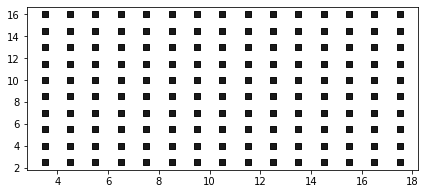

In [25]:
#visuliation seating layout
plt.figure(figsize=(7,3))
plt.scatter(xc,yc, marker = "s", c = "black",s = 30, alpha = 0.9)
#plt.xticks([])
#plt.yticks([])

In [26]:
#calculate distance matrix
coordinat = np.array(list(zip(xc,yc)))
distance = scipy.spatial.distance.cdist(coordinat,coordinat)

In [27]:
C = [(i,j) for i in range(n) for j in range(n)]

In [28]:
BigM = distance.max()

In [29]:
mdll = gb.Model("covid")

In [30]:
x = mdll.addVars(n, vtype = gb.GRB.BINARY, name = "x1")#if ith seat is taken, it equals 1, ow 0
z = mdll.addVars(C, vtype = gb.GRB.BINARY, name = "z")#if ith seat and jth seat is taken, it equals to 1, ow 0. This variable is created to overcome quadratic terms.

In [31]:
mdll.setObjective(gb.quicksum(x[i] for i in range(n)), gb.GRB.MAXIMIZE)#maximize number of taken seats

In [34]:
mdll.addConstrs(BigM*(1-z[i,j])+distance[i,j] >= 2 for i,j in C if j > i)#distance between two taken seats must be greater than a given value.

{(0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 10): <gurobi.Constr *Awaiting Model Update*>,
 (0, 11): <gurobi.Constr *Awaiting Model Update*>,
 (0, 12): <gurobi.Constr *Awaiting Model Update*>,
 (0, 13): <gurobi.Constr *Awaiting Model Update*>,
 (0, 14): <gurobi.Constr *Awaiting Model Update*>,
 (0, 15): <gurobi.Constr *Awaiting Model Update*>,
 (0, 16): <gurobi.Constr *Awaiting Model Update*>,
 (0, 17): <gurobi.Constr *Awaiting Model Update*>,
 (0, 18): <gurobi.Constr *Awaiting Model Update*>,
 (0, 19): <gurobi.Constr *Awaiting Model Update*>,
 (0, 20): <gurobi.Constr *Awaiting Model

In [35]:
#mdll.addConstrs(x[i] >= z[i,j] for i,j in C)#these are not necessary
#mdll.addConstrs(x[j] >= z[i,j] for i,j in C)
mdll.addConstrs(x[i] + x[j] - 1 <= z[i,j] for i,j in C if j > i)#to overcome quadratic terms. if ith and jth seats are taken, then zij equals to 1.

{(0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 10): <gurobi.Constr *Awaiting Model Update*>,
 (0, 11): <gurobi.Constr *Awaiting Model Update*>,
 (0, 12): <gurobi.Constr *Awaiting Model Update*>,
 (0, 13): <gurobi.Constr *Awaiting Model Update*>,
 (0, 14): <gurobi.Constr *Awaiting Model Update*>,
 (0, 15): <gurobi.Constr *Awaiting Model Update*>,
 (0, 16): <gurobi.Constr *Awaiting Model Update*>,
 (0, 17): <gurobi.Constr *Awaiting Model Update*>,
 (0, 18): <gurobi.Constr *Awaiting Model Update*>,
 (0, 19): <gurobi.Constr *Awaiting Model Update*>,
 (0, 20): <gurobi.Constr *Awaiting Model

In [36]:
mdll.params.PreQLinearize = 1
mdll.params.Method = 2
mdll.params.MIPFocus = 3
mdll.params.MIPGap = 0.04
mdll.optimize()

Changed value of parameter PreQLinearize to 1
   Prev: -1  Min: -1  Max: 2  Default: -1
Changed value of parameter Method to 2
   Prev: -1  Min: -1  Max: 5  Default: -1
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter MIPGap to 0.04
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 22350 rows, 22650 columns and 44700 nonzeros
Model fingerprint: 0x76fdf3a8
Variable types: 0 continuous, 22650 integer (22650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Found heuristic solution: objective 1.0000000
Presolve removed 22350 rows and 22650 columns
Presolve time: 0.02s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.04 seconds


In [37]:
mdll.printAttr('X')


    Variable            X 
-------------------------
       x1[0]            1 
       x1[2]            1 
       x1[4]            1 
       x1[6]            1 
       x1[8]            1 
      x1[10]            1 
      x1[12]            1 
      x1[14]            1 
      x1[30]            1 
      x1[32]            1 
      x1[34]            1 
      x1[36]            1 
      x1[38]            1 
      x1[40]            1 
      x1[42]            1 
      x1[44]            1 
      x1[60]            1 
      x1[70]            1 
      x1[77]            1 
      x1[79]            1 
      x1[81]            1 
      x1[83]            1 
      x1[87]            1 
      x1[89]            1 
     x1[105]            1 
     x1[107]            1 
     x1[109]            1 
     x1[111]            1 
     x1[113]            1 
     x1[115]            1 
     x1[117]            1 
     x1[119]            1 
     x1[135]            1 
     x1[137]            1 
     x1[139]            1 
 

    z[1,122]            1 
    z[1,123]            1 
    z[1,124]            1 
    z[1,125]            1 
    z[1,126]            1 
    z[1,127]            1 
    z[1,128]            1 
    z[1,129]            1 
    z[1,130]            1 
    z[1,131]            1 
    z[1,132]            1 
    z[1,133]            1 
    z[1,134]            1 
    z[1,135]            1 
    z[1,136]            1 
    z[1,137]            1 
    z[1,138]            1 
    z[1,139]            1 
    z[1,140]            1 
    z[1,141]            1 
    z[1,142]            1 
    z[1,143]            1 
    z[1,144]            1 
    z[1,145]            1 
    z[1,146]            1 
    z[1,147]            1 
    z[1,148]            1 
    z[1,149]            1 
      z[2,4]            1 
      z[2,5]            1 
      z[2,6]            1 
      z[2,7]            1 
      z[2,8]            1 
      z[2,9]            1 
     z[2,10]            1 
     z[2,11]            1 
     z[2,12]            1 
 

    z[3,141]            1 
    z[3,142]            1 
    z[3,143]            1 
    z[3,144]            1 
    z[3,145]            1 
    z[3,146]            1 
    z[3,147]            1 
    z[3,148]            1 
    z[3,149]            1 
      z[4,6]            1 
      z[4,7]            1 
      z[4,8]            1 
      z[4,9]            1 
     z[4,10]            1 
     z[4,11]            1 
     z[4,12]            1 
     z[4,13]            1 
     z[4,14]            1 
     z[4,15]            1 
     z[4,16]            1 
     z[4,17]            1 
     z[4,21]            1 
     z[4,22]            1 
     z[4,23]            1 
     z[4,24]            1 
     z[4,25]            1 
     z[4,26]            1 
     z[4,27]            1 
     z[4,28]            1 
     z[4,29]            1 
     z[4,30]            1 
     z[4,31]            1 
     z[4,32]            1 
     z[4,33]            1 
     z[4,34]            1 
     z[4,35]            1 
     z[4,36]            1 
 

     z[6,25]            1 
     z[6,26]            1 
     z[6,27]            1 
     z[6,28]            1 
     z[6,29]            1 
     z[6,30]            1 
     z[6,31]            1 
     z[6,32]            1 
     z[6,33]            1 
     z[6,34]            1 
     z[6,35]            1 
     z[6,36]            1 
     z[6,37]            1 
     z[6,38]            1 
     z[6,39]            1 
     z[6,40]            1 
     z[6,41]            1 
     z[6,42]            1 
     z[6,43]            1 
     z[6,44]            1 
     z[6,45]            1 
     z[6,46]            1 
     z[6,47]            1 
     z[6,48]            1 
     z[6,49]            1 
     z[6,50]            1 
     z[6,51]            1 
     z[6,52]            1 
     z[6,53]            1 
     z[6,54]            1 
     z[6,55]            1 
     z[6,56]            1 
     z[6,57]            1 
     z[6,58]            1 
     z[6,59]            1 
     z[6,60]            1 
     z[6,61]            1 
 

     z[8,54]            1 
     z[8,55]            1 
     z[8,56]            1 
     z[8,57]            1 
     z[8,58]            1 
     z[8,59]            1 
     z[8,60]            1 
     z[8,61]            1 
     z[8,62]            1 
     z[8,63]            1 
     z[8,64]            1 
     z[8,65]            1 
     z[8,66]            1 
     z[8,67]            1 
     z[8,68]            1 
     z[8,69]            1 
     z[8,70]            1 
     z[8,71]            1 
     z[8,72]            1 
     z[8,73]            1 
     z[8,74]            1 
     z[8,75]            1 
     z[8,76]            1 
     z[8,77]            1 
     z[8,78]            1 
     z[8,79]            1 
     z[8,80]            1 
     z[8,81]            1 
     z[8,82]            1 
     z[8,83]            1 
     z[8,84]            1 
     z[8,85]            1 
     z[8,86]            1 
     z[8,87]            1 
     z[8,88]            1 
     z[8,89]            1 
     z[8,90]            1 
 

    z[10,87]            1 
    z[10,88]            1 
    z[10,89]            1 
    z[10,90]            1 
    z[10,91]            1 
    z[10,92]            1 
    z[10,93]            1 
    z[10,94]            1 
    z[10,95]            1 
    z[10,96]            1 
    z[10,97]            1 
    z[10,98]            1 
    z[10,99]            1 
   z[10,100]            1 
   z[10,101]            1 
   z[10,102]            1 
   z[10,103]            1 
   z[10,104]            1 
   z[10,105]            1 
   z[10,106]            1 
   z[10,107]            1 
   z[10,108]            1 
   z[10,109]            1 
   z[10,110]            1 
   z[10,111]            1 
   z[10,112]            1 
   z[10,113]            1 
   z[10,114]            1 
   z[10,115]            1 
   z[10,116]            1 
   z[10,117]            1 
   z[10,118]            1 
   z[10,119]            1 
   z[10,120]            1 
   z[10,121]            1 
   z[10,122]            1 
   z[10,123]            1 
 

   z[12,124]            1 
   z[12,125]            1 
   z[12,126]            1 
   z[12,127]            1 
   z[12,128]            1 
   z[12,129]            1 
   z[12,130]            1 
   z[12,131]            1 
   z[12,132]            1 
   z[12,133]            1 
   z[12,134]            1 
   z[12,135]            1 
   z[12,136]            1 
   z[12,137]            1 
   z[12,138]            1 
   z[12,139]            1 
   z[12,140]            1 
   z[12,141]            1 
   z[12,142]            1 
   z[12,143]            1 
   z[12,144]            1 
   z[12,145]            1 
   z[12,146]            1 
   z[12,147]            1 
   z[12,148]            1 
   z[12,149]            1 
    z[13,15]            1 
    z[13,16]            1 
    z[13,17]            1 
    z[13,18]            1 
    z[13,19]            1 
    z[13,20]            1 
    z[13,21]            1 
    z[13,22]            1 
    z[13,23]            1 
    z[13,24]            1 
    z[13,25]            1 
 

    z[15,32]            1 
    z[15,33]            1 
    z[15,34]            1 
    z[15,35]            1 
    z[15,36]            1 
    z[15,37]            1 
    z[15,38]            1 
    z[15,39]            1 
    z[15,40]            1 
    z[15,41]            1 
    z[15,42]            1 
    z[15,43]            1 
    z[15,44]            1 
    z[15,45]            1 
    z[15,46]            1 
    z[15,47]            1 
    z[15,48]            1 
    z[15,49]            1 
    z[15,50]            1 
    z[15,51]            1 
    z[15,52]            1 
    z[15,53]            1 
    z[15,54]            1 
    z[15,55]            1 
    z[15,56]            1 
    z[15,57]            1 
    z[15,58]            1 
    z[15,59]            1 
    z[15,60]            1 
    z[15,61]            1 
    z[15,62]            1 
    z[15,63]            1 
    z[15,64]            1 
    z[15,65]            1 
    z[15,66]            1 
    z[15,67]            1 
    z[15,68]            1 
 

    z[17,79]            1 
    z[17,80]            1 
    z[17,81]            1 
    z[17,82]            1 
    z[17,83]            1 
    z[17,84]            1 
    z[17,85]            1 
    z[17,86]            1 
    z[17,87]            1 
    z[17,88]            1 
    z[17,89]            1 
    z[17,90]            1 
    z[17,91]            1 
    z[17,92]            1 
    z[17,93]            1 
    z[17,94]            1 
    z[17,95]            1 
    z[17,96]            1 
    z[17,97]            1 
    z[17,98]            1 
    z[17,99]            1 
   z[17,100]            1 
   z[17,101]            1 
   z[17,102]            1 
   z[17,103]            1 
   z[17,104]            1 
   z[17,105]            1 
   z[17,106]            1 
   z[17,107]            1 
   z[17,108]            1 
   z[17,109]            1 
   z[17,110]            1 
   z[17,111]            1 
   z[17,112]            1 
   z[17,113]            1 
   z[17,114]            1 
   z[17,115]            1 
 

   z[19,130]            1 
   z[19,131]            1 
   z[19,132]            1 
   z[19,133]            1 
   z[19,134]            1 
   z[19,135]            1 
   z[19,136]            1 
   z[19,137]            1 
   z[19,138]            1 
   z[19,139]            1 
   z[19,140]            1 
   z[19,141]            1 
   z[19,142]            1 
   z[19,143]            1 
   z[19,144]            1 
   z[19,145]            1 
   z[19,146]            1 
   z[19,147]            1 
   z[19,148]            1 
   z[19,149]            1 
    z[20,22]            1 
    z[20,23]            1 
    z[20,24]            1 
    z[20,25]            1 
    z[20,26]            1 
    z[20,27]            1 
    z[20,28]            1 
    z[20,29]            1 
    z[20,30]            1 
    z[20,31]            1 
    z[20,32]            1 
    z[20,33]            1 
    z[20,37]            1 
    z[20,38]            1 
    z[20,39]            1 
    z[20,40]            1 
    z[20,41]            1 
 

    z[22,62]            1 
    z[22,63]            1 
    z[22,64]            1 
    z[22,65]            1 
    z[22,66]            1 
    z[22,67]            1 
    z[22,68]            1 
    z[22,69]            1 
    z[22,70]            1 
    z[22,71]            1 
    z[22,72]            1 
    z[22,73]            1 
    z[22,74]            1 
    z[22,75]            1 
    z[22,76]            1 
    z[22,77]            1 
    z[22,78]            1 
    z[22,79]            1 
    z[22,80]            1 
    z[22,81]            1 
    z[22,82]            1 
    z[22,83]            1 
    z[22,84]            1 
    z[22,85]            1 
    z[22,86]            1 
    z[22,87]            1 
    z[22,88]            1 
    z[22,89]            1 
    z[22,90]            1 
    z[22,91]            1 
    z[22,92]            1 
    z[22,93]            1 
    z[22,94]            1 
    z[22,95]            1 
    z[22,96]            1 
    z[22,97]            1 
    z[22,98]            1 
 

   z[24,123]            1 
   z[24,124]            1 
   z[24,125]            1 
   z[24,126]            1 
   z[24,127]            1 
   z[24,128]            1 
   z[24,129]            1 
   z[24,130]            1 
   z[24,131]            1 
   z[24,132]            1 
   z[24,133]            1 
   z[24,134]            1 
   z[24,135]            1 
   z[24,136]            1 
   z[24,137]            1 
   z[24,138]            1 
   z[24,139]            1 
   z[24,140]            1 
   z[24,141]            1 
   z[24,142]            1 
   z[24,143]            1 
   z[24,144]            1 
   z[24,145]            1 
   z[24,146]            1 
   z[24,147]            1 
   z[24,148]            1 
   z[24,149]            1 
    z[25,27]            1 
    z[25,28]            1 
    z[25,29]            1 
    z[25,30]            1 
    z[25,31]            1 
    z[25,32]            1 
    z[25,33]            1 
    z[25,34]            1 
    z[25,35]            1 
    z[25,36]            1 
 

    z[27,70]            1 
    z[27,71]            1 
    z[27,72]            1 
    z[27,73]            1 
    z[27,74]            1 
    z[27,75]            1 
    z[27,76]            1 
    z[27,77]            1 
    z[27,78]            1 
    z[27,79]            1 
    z[27,80]            1 
    z[27,81]            1 
    z[27,82]            1 
    z[27,83]            1 
    z[27,84]            1 
    z[27,85]            1 
    z[27,86]            1 
    z[27,87]            1 
    z[27,88]            1 
    z[27,89]            1 
    z[27,90]            1 
    z[27,91]            1 
    z[27,92]            1 
    z[27,93]            1 
    z[27,94]            1 
    z[27,95]            1 
    z[27,96]            1 
    z[27,97]            1 
    z[27,98]            1 
    z[27,99]            1 
   z[27,100]            1 
   z[27,101]            1 
   z[27,102]            1 
   z[27,103]            1 
   z[27,104]            1 
   z[27,105]            1 
   z[27,106]            1 
 

   z[29,139]            1 
   z[29,140]            1 
   z[29,141]            1 
   z[29,142]            1 
   z[29,143]            1 
   z[29,144]            1 
   z[29,145]            1 
   z[29,146]            1 
   z[29,147]            1 
   z[29,148]            1 
   z[29,149]            1 
    z[30,32]            1 
    z[30,33]            1 
    z[30,34]            1 
    z[30,35]            1 
    z[30,36]            1 
    z[30,37]            1 
    z[30,38]            1 
    z[30,39]            1 
    z[30,40]            1 
    z[30,41]            1 
    z[30,42]            1 
    z[30,43]            1 
    z[30,44]            1 
    z[30,47]            1 
    z[30,48]            1 
    z[30,49]            1 
    z[30,50]            1 
    z[30,51]            1 
    z[30,52]            1 
    z[30,53]            1 
    z[30,54]            1 
    z[30,55]            1 
    z[30,56]            1 
    z[30,57]            1 
    z[30,58]            1 
    z[30,59]            1 
 

   z[32,100]            1 
   z[32,101]            1 
   z[32,102]            1 
   z[32,103]            1 
   z[32,104]            1 
   z[32,105]            1 
   z[32,106]            1 
   z[32,107]            1 
   z[32,108]            1 
   z[32,109]            1 
   z[32,110]            1 
   z[32,111]            1 
   z[32,112]            1 
   z[32,113]            1 
   z[32,114]            1 
   z[32,115]            1 
   z[32,116]            1 
   z[32,117]            1 
   z[32,118]            1 
   z[32,119]            1 
   z[32,120]            1 
   z[32,121]            1 
   z[32,122]            1 
   z[32,123]            1 
   z[32,124]            1 
   z[32,125]            1 
   z[32,126]            1 
   z[32,127]            1 
   z[32,128]            1 
   z[32,129]            1 
   z[32,130]            1 
   z[32,131]            1 
   z[32,132]            1 
   z[32,133]            1 
   z[32,134]            1 
   z[32,135]            1 
   z[32,136]            1 
 

    z[35,71]            1 
    z[35,72]            1 
    z[35,73]            1 
    z[35,74]            1 
    z[35,75]            1 
    z[35,76]            1 
    z[35,77]            1 
    z[35,78]            1 
    z[35,79]            1 
    z[35,80]            1 
    z[35,81]            1 
    z[35,82]            1 
    z[35,83]            1 
    z[35,84]            1 
    z[35,85]            1 
    z[35,86]            1 
    z[35,87]            1 
    z[35,88]            1 
    z[35,89]            1 
    z[35,90]            1 
    z[35,91]            1 
    z[35,92]            1 
    z[35,93]            1 
    z[35,94]            1 
    z[35,95]            1 
    z[35,96]            1 
    z[35,97]            1 
    z[35,98]            1 
    z[35,99]            1 
   z[35,100]            1 
   z[35,101]            1 
   z[35,102]            1 
   z[35,103]            1 
   z[35,104]            1 
   z[35,105]            1 
   z[35,106]            1 
   z[35,107]            1 
 

    z[38,48]            1 
    z[38,49]            1 
    z[38,50]            1 
    z[38,51]            1 
    z[38,55]            1 
    z[38,56]            1 
    z[38,57]            1 
    z[38,58]            1 
    z[38,59]            1 
    z[38,60]            1 
    z[38,61]            1 
    z[38,62]            1 
    z[38,63]            1 
    z[38,64]            1 
    z[38,65]            1 
    z[38,66]            1 
    z[38,67]            1 
    z[38,68]            1 
    z[38,69]            1 
    z[38,70]            1 
    z[38,71]            1 
    z[38,72]            1 
    z[38,73]            1 
    z[38,74]            1 
    z[38,75]            1 
    z[38,76]            1 
    z[38,77]            1 
    z[38,78]            1 
    z[38,79]            1 
    z[38,80]            1 
    z[38,81]            1 
    z[38,82]            1 
    z[38,83]            1 
    z[38,84]            1 
    z[38,85]            1 
    z[38,86]            1 
    z[38,87]            1 
 

   z[40,144]            1 
   z[40,145]            1 
   z[40,146]            1 
   z[40,147]            1 
   z[40,148]            1 
   z[40,149]            1 
    z[41,43]            1 
    z[41,44]            1 
    z[41,45]            1 
    z[41,46]            1 
    z[41,47]            1 
    z[41,48]            1 
    z[41,49]            1 
    z[41,50]            1 
    z[41,51]            1 
    z[41,52]            1 
    z[41,53]            1 
    z[41,54]            1 
    z[41,58]            1 
    z[41,59]            1 
    z[41,60]            1 
    z[41,61]            1 
    z[41,62]            1 
    z[41,63]            1 
    z[41,64]            1 
    z[41,65]            1 
    z[41,66]            1 
    z[41,67]            1 
    z[41,68]            1 
    z[41,69]            1 
    z[41,70]            1 
    z[41,71]            1 
    z[41,72]            1 
    z[41,73]            1 
    z[41,74]            1 
    z[41,75]            1 
    z[41,76]            1 
 

   z[43,139]            1 
   z[43,140]            1 
   z[43,141]            1 
   z[43,142]            1 
   z[43,143]            1 
   z[43,144]            1 
   z[43,145]            1 
   z[43,146]            1 
   z[43,147]            1 
   z[43,148]            1 
   z[43,149]            1 
    z[44,45]            1 
    z[44,46]            1 
    z[44,47]            1 
    z[44,48]            1 
    z[44,49]            1 
    z[44,50]            1 
    z[44,51]            1 
    z[44,52]            1 
    z[44,53]            1 
    z[44,54]            1 
    z[44,55]            1 
    z[44,56]            1 
    z[44,57]            1 
    z[44,60]            1 
    z[44,61]            1 
    z[44,62]            1 
    z[44,63]            1 
    z[44,64]            1 
    z[44,65]            1 
    z[44,66]            1 
    z[44,67]            1 
    z[44,68]            1 
    z[44,69]            1 
    z[44,70]            1 
    z[44,71]            1 
    z[44,72]            1 
 

   z[46,140]            1 
   z[46,141]            1 
   z[46,142]            1 
   z[46,143]            1 
   z[46,144]            1 
   z[46,145]            1 
   z[46,146]            1 
   z[46,147]            1 
   z[46,148]            1 
   z[46,149]            1 
    z[47,49]            1 
    z[47,50]            1 
    z[47,51]            1 
    z[47,52]            1 
    z[47,53]            1 
    z[47,54]            1 
    z[47,55]            1 
    z[47,56]            1 
    z[47,57]            1 
    z[47,58]            1 
    z[47,59]            1 
    z[47,60]            1 
    z[47,64]            1 
    z[47,65]            1 
    z[47,66]            1 
    z[47,67]            1 
    z[47,68]            1 
    z[47,69]            1 
    z[47,70]            1 
    z[47,71]            1 
    z[47,72]            1 
    z[47,73]            1 
    z[47,74]            1 
    z[47,75]            1 
    z[47,76]            1 
    z[47,77]            1 
    z[47,78]            1 
 

    z[50,55]            1 
    z[50,56]            1 
    z[50,57]            1 
    z[50,58]            1 
    z[50,59]            1 
    z[50,60]            1 
    z[50,61]            1 
    z[50,62]            1 
    z[50,63]            1 
    z[50,67]            1 
    z[50,68]            1 
    z[50,69]            1 
    z[50,70]            1 
    z[50,71]            1 
    z[50,72]            1 
    z[50,73]            1 
    z[50,74]            1 
    z[50,75]            1 
    z[50,76]            1 
    z[50,77]            1 
    z[50,78]            1 
    z[50,79]            1 
    z[50,80]            1 
    z[50,81]            1 
    z[50,82]            1 
    z[50,83]            1 
    z[50,84]            1 
    z[50,85]            1 
    z[50,86]            1 
    z[50,87]            1 
    z[50,88]            1 
    z[50,89]            1 
    z[50,90]            1 
    z[50,91]            1 
    z[50,92]            1 
    z[50,93]            1 
    z[50,94]            1 
 

    z[53,83]            1 
    z[53,84]            1 
    z[53,85]            1 
    z[53,86]            1 
    z[53,87]            1 
    z[53,88]            1 
    z[53,89]            1 
    z[53,90]            1 
    z[53,91]            1 
    z[53,92]            1 
    z[53,93]            1 
    z[53,94]            1 
    z[53,95]            1 
    z[53,96]            1 
    z[53,97]            1 
    z[53,98]            1 
    z[53,99]            1 
   z[53,100]            1 
   z[53,101]            1 
   z[53,102]            1 
   z[53,103]            1 
   z[53,104]            1 
   z[53,105]            1 
   z[53,106]            1 
   z[53,107]            1 
   z[53,108]            1 
   z[53,109]            1 
   z[53,110]            1 
   z[53,111]            1 
   z[53,112]            1 
   z[53,113]            1 
   z[53,114]            1 
   z[53,115]            1 
   z[53,116]            1 
   z[53,117]            1 
   z[53,118]            1 
   z[53,119]            1 
 

   z[56,117]            1 
   z[56,118]            1 
   z[56,119]            1 
   z[56,120]            1 
   z[56,121]            1 
   z[56,122]            1 
   z[56,123]            1 
   z[56,124]            1 
   z[56,125]            1 
   z[56,126]            1 
   z[56,127]            1 
   z[56,128]            1 
   z[56,129]            1 
   z[56,130]            1 
   z[56,131]            1 
   z[56,132]            1 
   z[56,133]            1 
   z[56,134]            1 
   z[56,135]            1 
   z[56,136]            1 
   z[56,137]            1 
   z[56,138]            1 
   z[56,139]            1 
   z[56,140]            1 
   z[56,141]            1 
   z[56,142]            1 
   z[56,143]            1 
   z[56,144]            1 
   z[56,145]            1 
   z[56,146]            1 
   z[56,147]            1 
   z[56,148]            1 
   z[56,149]            1 
    z[57,59]            1 
    z[57,60]            1 
    z[57,61]            1 
    z[57,62]            1 
 

    z[60,70]            1 
    z[60,71]            1 
    z[60,72]            1 
    z[60,73]            1 
    z[60,74]            1 
    z[60,77]            1 
    z[60,78]            1 
    z[60,79]            1 
    z[60,80]            1 
    z[60,81]            1 
    z[60,82]            1 
    z[60,83]            1 
    z[60,84]            1 
    z[60,85]            1 
    z[60,86]            1 
    z[60,87]            1 
    z[60,88]            1 
    z[60,89]            1 
    z[60,90]            1 
    z[60,91]            1 
    z[60,92]            1 
    z[60,93]            1 
    z[60,94]            1 
    z[60,95]            1 
    z[60,96]            1 
    z[60,97]            1 
    z[60,98]            1 
    z[60,99]            1 
   z[60,100]            1 
   z[60,101]            1 
   z[60,102]            1 
   z[60,103]            1 
   z[60,104]            1 
   z[60,105]            1 
   z[60,106]            1 
   z[60,107]            1 
   z[60,108]            1 
 

   z[63,127]            1 
   z[63,128]            1 
   z[63,129]            1 
   z[63,130]            1 
   z[63,131]            1 
   z[63,132]            1 
   z[63,133]            1 
   z[63,134]            1 
   z[63,135]            1 
   z[63,136]            1 
   z[63,137]            1 
   z[63,138]            1 
   z[63,139]            1 
   z[63,140]            1 
   z[63,141]            1 
   z[63,142]            1 
   z[63,143]            1 
   z[63,144]            1 
   z[63,145]            1 
   z[63,146]            1 
   z[63,147]            1 
   z[63,148]            1 
   z[63,149]            1 
    z[64,66]            1 
    z[64,67]            1 
    z[64,68]            1 
    z[64,69]            1 
    z[64,70]            1 
    z[64,71]            1 
    z[64,72]            1 
    z[64,73]            1 
    z[64,74]            1 
    z[64,75]            1 
    z[64,76]            1 
    z[64,77]            1 
    z[64,81]            1 
    z[64,82]            1 
 

   z[67,113]            1 
   z[67,114]            1 
   z[67,115]            1 
   z[67,116]            1 
   z[67,117]            1 
   z[67,118]            1 
   z[67,119]            1 
   z[67,120]            1 
   z[67,121]            1 
   z[67,122]            1 
   z[67,123]            1 
   z[67,124]            1 
   z[67,125]            1 
   z[67,126]            1 
   z[67,127]            1 
   z[67,128]            1 
   z[67,129]            1 
   z[67,130]            1 
   z[67,131]            1 
   z[67,132]            1 
   z[67,133]            1 
   z[67,134]            1 
   z[67,135]            1 
   z[67,136]            1 
   z[67,137]            1 
   z[67,138]            1 
   z[67,139]            1 
   z[67,140]            1 
   z[67,141]            1 
   z[67,142]            1 
   z[67,143]            1 
   z[67,144]            1 
   z[67,145]            1 
   z[67,146]            1 
   z[67,147]            1 
   z[67,148]            1 
   z[67,149]            1 
 

   z[71,115]            1 
   z[71,116]            1 
   z[71,117]            1 
   z[71,118]            1 
   z[71,119]            1 
   z[71,120]            1 
   z[71,121]            1 
   z[71,122]            1 
   z[71,123]            1 
   z[71,124]            1 
   z[71,125]            1 
   z[71,126]            1 
   z[71,127]            1 
   z[71,128]            1 
   z[71,129]            1 
   z[71,130]            1 
   z[71,131]            1 
   z[71,132]            1 
   z[71,133]            1 
   z[71,134]            1 
   z[71,135]            1 
   z[71,136]            1 
   z[71,137]            1 
   z[71,138]            1 
   z[71,139]            1 
   z[71,140]            1 
   z[71,141]            1 
   z[71,142]            1 
   z[71,143]            1 
   z[71,144]            1 
   z[71,145]            1 
   z[71,146]            1 
   z[71,147]            1 
   z[71,148]            1 
   z[71,149]            1 
    z[72,74]            1 
    z[72,75]            1 
 

   z[75,130]            1 
   z[75,131]            1 
   z[75,132]            1 
   z[75,133]            1 
   z[75,134]            1 
   z[75,135]            1 
   z[75,136]            1 
   z[75,137]            1 
   z[75,138]            1 
   z[75,139]            1 
   z[75,140]            1 
   z[75,141]            1 
   z[75,142]            1 
   z[75,143]            1 
   z[75,144]            1 
   z[75,145]            1 
   z[75,146]            1 
   z[75,147]            1 
   z[75,148]            1 
   z[75,149]            1 
    z[76,78]            1 
    z[76,79]            1 
    z[76,80]            1 
    z[76,81]            1 
    z[76,82]            1 
    z[76,83]            1 
    z[76,84]            1 
    z[76,85]            1 
    z[76,86]            1 
    z[76,87]            1 
    z[76,88]            1 
    z[76,89]            1 
    z[76,93]            1 
    z[76,94]            1 
    z[76,95]            1 
    z[76,96]            1 
    z[76,97]            1 
 

    z[80,99]            1 
   z[80,100]            1 
   z[80,101]            1 
   z[80,102]            1 
   z[80,103]            1 
   z[80,104]            1 
   z[80,105]            1 
   z[80,106]            1 
   z[80,107]            1 
   z[80,108]            1 
   z[80,109]            1 
   z[80,110]            1 
   z[80,111]            1 
   z[80,112]            1 
   z[80,113]            1 
   z[80,114]            1 
   z[80,115]            1 
   z[80,116]            1 
   z[80,117]            1 
   z[80,118]            1 
   z[80,119]            1 
   z[80,120]            1 
   z[80,121]            1 
   z[80,122]            1 
   z[80,123]            1 
   z[80,124]            1 
   z[80,125]            1 
   z[80,126]            1 
   z[80,127]            1 
   z[80,128]            1 
   z[80,129]            1 
   z[80,130]            1 
   z[80,131]            1 
   z[80,132]            1 
   z[80,133]            1 
   z[80,134]            1 
   z[80,135]            1 
 

    z[85,90]            1 
    z[85,91]            1 
    z[85,92]            1 
    z[85,93]            1 
    z[85,94]            1 
    z[85,95]            1 
    z[85,96]            1 
    z[85,97]            1 
    z[85,98]            1 
   z[85,102]            1 
   z[85,103]            1 
   z[85,104]            1 
   z[85,105]            1 
   z[85,106]            1 
   z[85,107]            1 
   z[85,108]            1 
   z[85,109]            1 
   z[85,110]            1 
   z[85,111]            1 
   z[85,112]            1 
   z[85,113]            1 
   z[85,114]            1 
   z[85,115]            1 
   z[85,116]            1 
   z[85,117]            1 
   z[85,118]            1 
   z[85,119]            1 
   z[85,120]            1 
   z[85,121]            1 
   z[85,122]            1 
   z[85,123]            1 
   z[85,124]            1 
   z[85,125]            1 
   z[85,126]            1 
   z[85,127]            1 
   z[85,128]            1 
   z[85,129]            1 
 

   z[90,109]            1 
   z[90,110]            1 
   z[90,111]            1 
   z[90,112]            1 
   z[90,113]            1 
   z[90,114]            1 
   z[90,115]            1 
   z[90,116]            1 
   z[90,117]            1 
   z[90,118]            1 
   z[90,119]            1 
   z[90,120]            1 
   z[90,121]            1 
   z[90,122]            1 
   z[90,123]            1 
   z[90,124]            1 
   z[90,125]            1 
   z[90,126]            1 
   z[90,127]            1 
   z[90,128]            1 
   z[90,129]            1 
   z[90,130]            1 
   z[90,131]            1 
   z[90,132]            1 
   z[90,133]            1 
   z[90,134]            1 
   z[90,135]            1 
   z[90,136]            1 
   z[90,137]            1 
   z[90,138]            1 
   z[90,139]            1 
   z[90,140]            1 
   z[90,141]            1 
   z[90,142]            1 
   z[90,143]            1 
   z[90,144]            1 
   z[90,145]            1 
 

   z[96,101]            1 
   z[96,102]            1 
   z[96,103]            1 
   z[96,104]            1 
   z[96,105]            1 
   z[96,106]            1 
   z[96,107]            1 
   z[96,108]            1 
   z[96,109]            1 
   z[96,113]            1 
   z[96,114]            1 
   z[96,115]            1 
   z[96,116]            1 
   z[96,117]            1 
   z[96,118]            1 
   z[96,119]            1 
   z[96,120]            1 
   z[96,121]            1 
   z[96,122]            1 
   z[96,123]            1 
   z[96,124]            1 
   z[96,125]            1 
   z[96,126]            1 
   z[96,127]            1 
   z[96,128]            1 
   z[96,129]            1 
   z[96,130]            1 
   z[96,131]            1 
   z[96,132]            1 
   z[96,133]            1 
   z[96,134]            1 
   z[96,135]            1 
   z[96,136]            1 
   z[96,137]            1 
   z[96,138]            1 
   z[96,139]            1 
   z[96,140]            1 
 

  z[102,135]            1 
  z[102,136]            1 
  z[102,137]            1 
  z[102,138]            1 
  z[102,139]            1 
  z[102,140]            1 
  z[102,141]            1 
  z[102,142]            1 
  z[102,143]            1 
  z[102,144]            1 
  z[102,145]            1 
  z[102,146]            1 
  z[102,147]            1 
  z[102,148]            1 
  z[102,149]            1 
  z[103,105]            1 
  z[103,106]            1 
  z[103,107]            1 
  z[103,108]            1 
  z[103,109]            1 
  z[103,110]            1 
  z[103,111]            1 
  z[103,112]            1 
  z[103,113]            1 
  z[103,114]            1 
  z[103,115]            1 
  z[103,116]            1 
  z[103,120]            1 
  z[103,121]            1 
  z[103,122]            1 
  z[103,123]            1 
  z[103,124]            1 
  z[103,125]            1 
  z[103,126]            1 
  z[103,127]            1 
  z[103,128]            1 
  z[103,129]            1 
 

  z[110,128]            1 
  z[110,129]            1 
  z[110,130]            1 
  z[110,131]            1 
  z[110,132]            1 
  z[110,133]            1 
  z[110,134]            1 
  z[110,135]            1 
  z[110,136]            1 
  z[110,137]            1 
  z[110,138]            1 
  z[110,139]            1 
  z[110,140]            1 
  z[110,141]            1 
  z[110,142]            1 
  z[110,143]            1 
  z[110,144]            1 
  z[110,145]            1 
  z[110,146]            1 
  z[110,147]            1 
  z[110,148]            1 
  z[110,149]            1 
  z[111,113]            1 
  z[111,114]            1 
  z[111,115]            1 
  z[111,116]            1 
  z[111,117]            1 
  z[111,118]            1 
  z[111,119]            1 
  z[111,120]            1 
  z[111,121]            1 
  z[111,122]            1 
  z[111,123]            1 
  z[111,124]            1 
  z[111,128]            1 
  z[111,129]            1 
  z[111,130]            1 
 

  z[120,132]            1 
  z[120,133]            1 
  z[120,134]            1 
  z[120,137]            1 
  z[120,138]            1 
  z[120,139]            1 
  z[120,140]            1 
  z[120,141]            1 
  z[120,142]            1 
  z[120,143]            1 
  z[120,144]            1 
  z[120,145]            1 
  z[120,146]            1 
  z[120,147]            1 
  z[120,148]            1 
  z[120,149]            1 
  z[121,123]            1 
  z[121,124]            1 
  z[121,125]            1 
  z[121,126]            1 
  z[121,127]            1 
  z[121,128]            1 
  z[121,129]            1 
  z[121,130]            1 
  z[121,131]            1 
  z[121,132]            1 
  z[121,133]            1 
  z[121,134]            1 
  z[121,138]            1 
  z[121,139]            1 
  z[121,140]            1 
  z[121,141]            1 
  z[121,142]            1 
  z[121,143]            1 
  z[121,144]            1 
  z[121,145]            1 
  z[121,146]            1 
 

  z[138,145]            1 
  z[138,146]            1 
  z[138,147]            1 
  z[138,148]            1 
  z[138,149]            1 
  z[139,141]            1 
  z[139,142]            1 
  z[139,143]            1 
  z[139,144]            1 
  z[139,145]            1 
  z[139,146]            1 
  z[139,147]            1 
  z[139,148]            1 
  z[139,149]            1 
  z[140,142]            1 
  z[140,143]            1 
  z[140,144]            1 
  z[140,145]            1 
  z[140,146]            1 
  z[140,147]            1 
  z[140,148]            1 
  z[140,149]            1 
  z[141,143]            1 
  z[141,144]            1 
  z[141,145]            1 
  z[141,146]            1 
  z[141,147]            1 
  z[141,148]            1 
  z[141,149]            1 
  z[142,144]            1 
  z[142,145]            1 
  z[142,146]            1 
  z[142,147]            1 
  z[142,148]            1 
  z[142,149]            1 
  z[143,145]            1 
  z[143,146]            1 
 

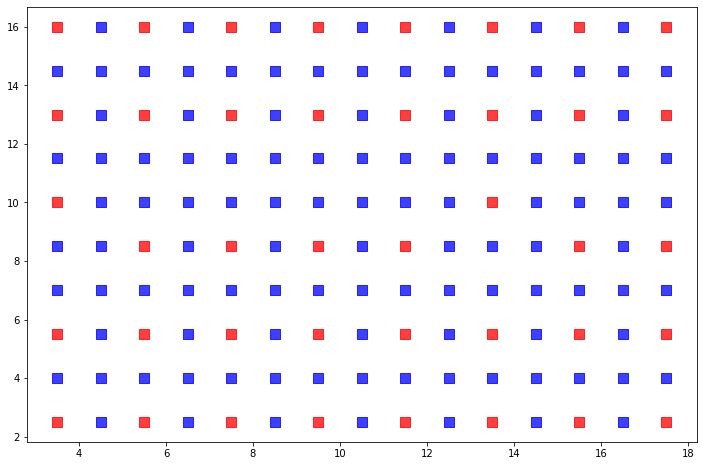

In [38]:
plt.figure(figsize=(12,8))
xc = np.array(coordinat[:,0:1])
yc = np.array(coordinat[:,1:2])
for i in x:
    if x[i].x == 1:
        plt.scatter([xc[i], xc[i]], [yc[i], yc[i]], c='r', marker = "s",s = 100, zorder=0,linewidth=1,alpha=0.5)#alpha tansparancy
    else:
         plt.scatter([xc[i], xc[i]], [yc[i], yc[i]], c='b',marker = "s", s = 100, zorder=0,linewidth=1,alpha=0.5)#alpha tansparancy